<a href="https://colab.research.google.com/github/marcinwolter/MachineLearnin2019/blob/master/gan_generate_letters_failing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


W0213 22:21:41.938776 140449151678336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0213 22:21:41.941102 140449151678336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0213 22:21:41.947154 140449151678336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0213 22:21:42.001537 140449151678336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0213 22:21:42.008928 140449151678336 module_wrapper.py:139] From /usr/local

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 26, 26, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
__________

/usr/local/lib/python2.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
W0213 22:21:42.989554 140449151678336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0213 22:21:43.105967 140449151678336 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



epoch: 0, [Discriminator :: d_loss: 0.675120], [ Generator :: loss: 0.442030]


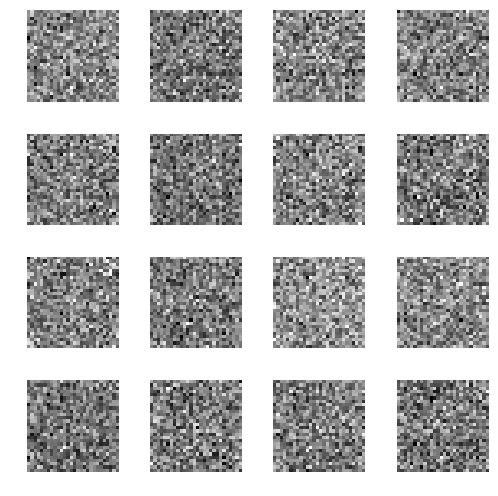

epoch: 100, [Discriminator :: d_loss: 0.295298], [ Generator :: loss: 5.807889]


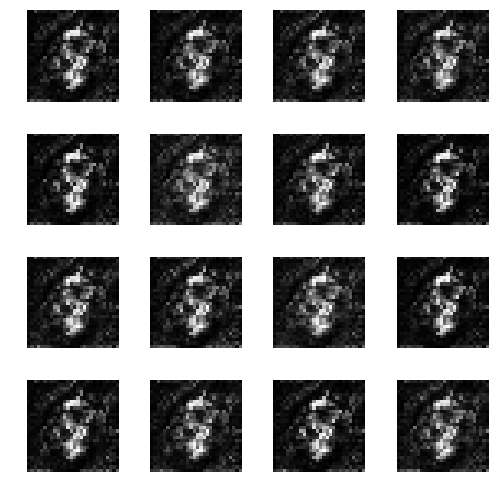

epoch: 200, [Discriminator :: d_loss: 0.000934], [ Generator :: loss: 16.118095]


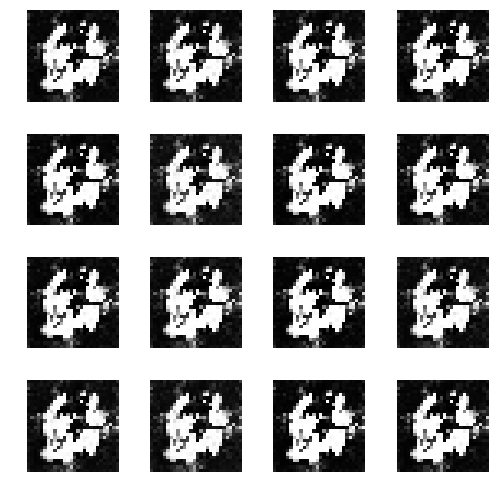

epoch: 300, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 16.118095]


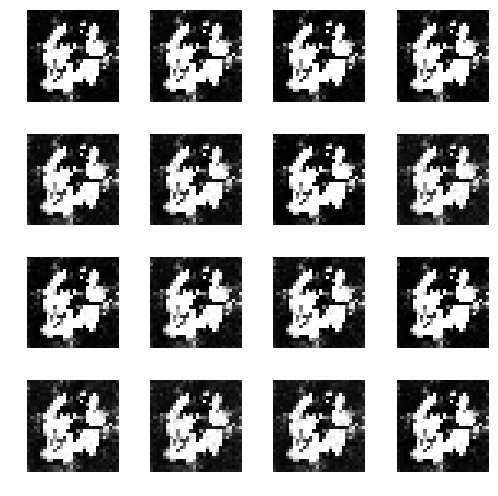

epoch: 400, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 16.118095]


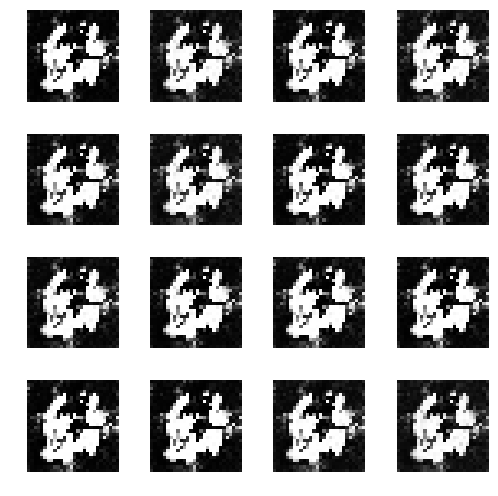

epoch: 500, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]


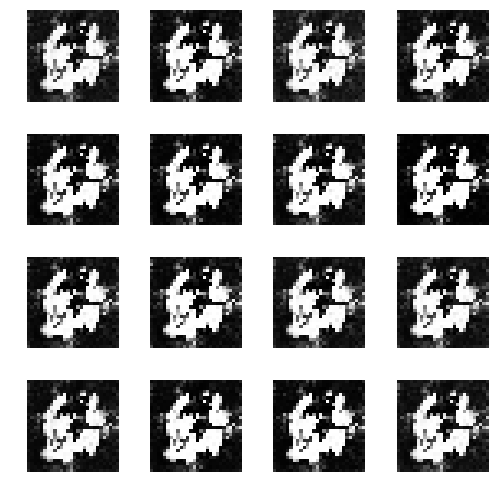

epoch: 600, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 16.118095]


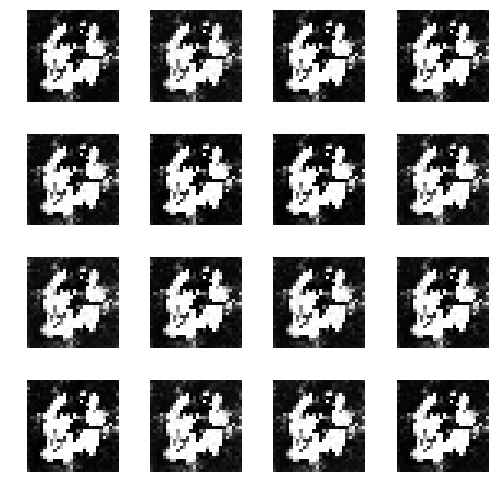

epoch: 700, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 16.118095]


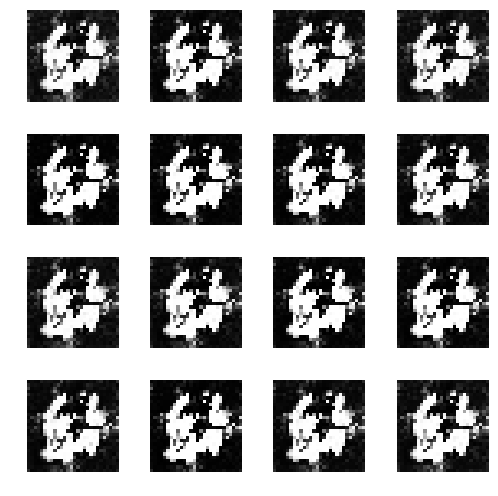

epoch: 800, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 16.118095]


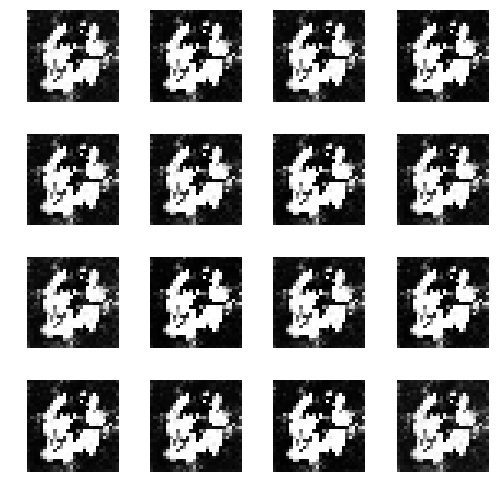

epoch: 900, [Discriminator :: d_loss: 0.000007], [ Generator :: loss: 16.118095]


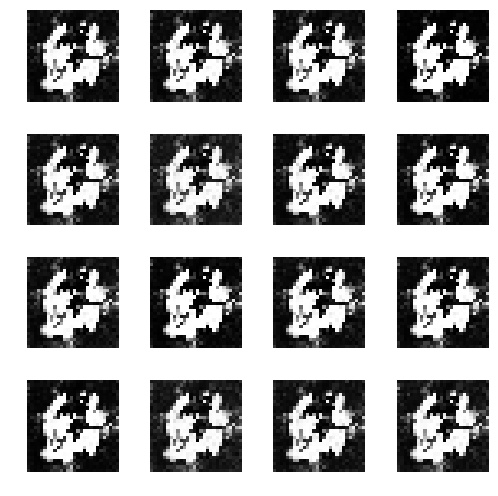

epoch: 1000, [Discriminator :: d_loss: 0.000001], [ Generator :: loss: 16.118095]


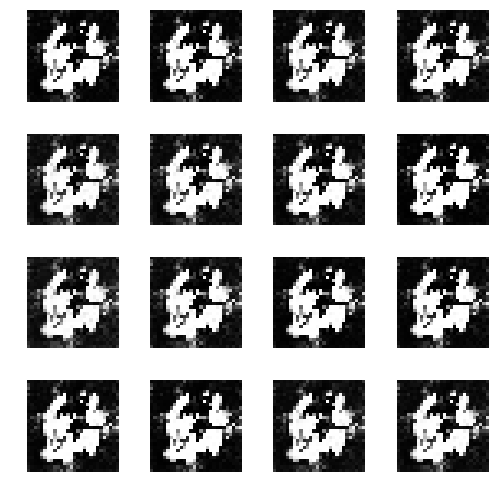

epoch: 1100, [Discriminator :: d_loss: 0.000002], [ Generator :: loss: 16.118095]


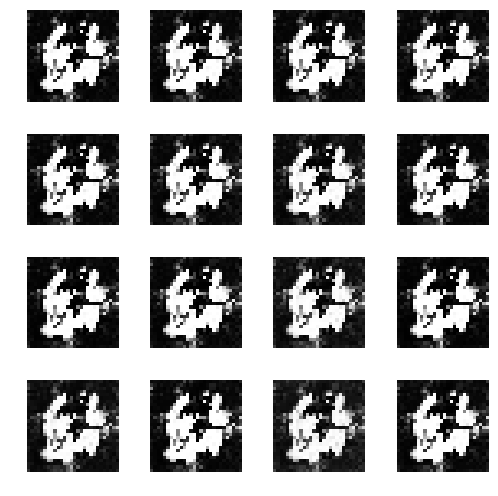

epoch: 1200, [Discriminator :: d_loss: 0.000003], [ Generator :: loss: 16.118095]


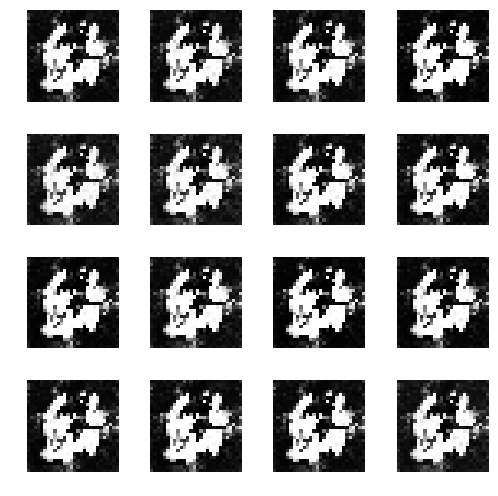

epoch: 1300, [Discriminator :: d_loss: 0.000000], [ Generator :: loss: 16.118095]


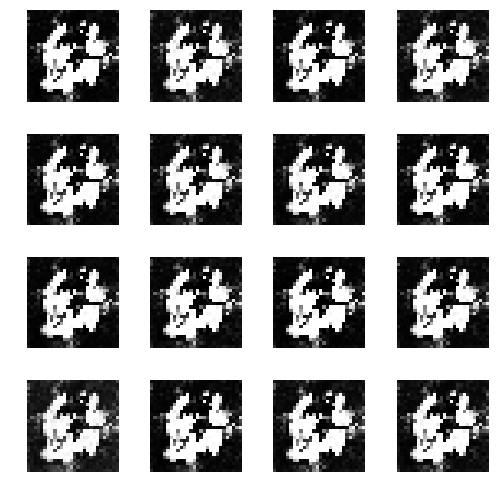

In [0]:
""" Simple implementation of Generative Adversarial Neural Network """

# This code is specially modified to generate just one, single digit

import numpy as np

#from IPython.core.debugger import Tracer

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

import matplotlib.pyplot as plt
#plt.switch_backend('agg')   # allows code to run without a system DISPLAY


class GAN(object):
    """ Generative Adversarial Network class """
    def __init__(self, width=28, height=28, channels=1):

        self.width = width
        self.height = height
        self.channels = channels

        self.shape = (self.width, self.height, self.channels)

        self.optimizer = Adam(lr=0.0002, beta_1=0.5, decay=8e-8)

        self.G = self.__generator()
        self.G.compile(loss='binary_crossentropy', optimizer=self.optimizer)

        self.D = self.__discriminator()
        self.D.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

        self.stacked_generator_discriminator = self.__stacked_generator_discriminator()

        self.stacked_generator_discriminator.compile(loss='binary_crossentropy', optimizer=self.optimizer)


    def __generator(self):
        """ Declare generator """

        model = Sequential()
        model.add(Dense(256, input_shape=(100,)))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        #model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(self.width  * self.height * self.channels, activation='tanh'))
        model.add(Reshape((self.width, self.height, self.channels)))

        return model

    def __discriminator(self):
        """ Declare discriminator """

        model = Sequential()
        model.add(Conv2D(64,(3,3), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.2))
        model.add(Conv2D(128,(3,3), input_shape=self.shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.2))
        #model.add(Flatten(input_shape=self.shape))
        #model.add(Dense(15*(self.width * self.height * self.channels), input_shape=self.shape))
        #model.add(LeakyReLU(alpha=0.2))
        #model.add(Dense(15*np.int64((self.width * self.height * self.channels)/2)))
        #model.add(LeakyReLU(alpha=0.2))    
        model.add(Flatten())           
        model.add(Dense(np.int64((self.width * self.height * self.channels))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(np.int64((self.width * self.height * self.channels))))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        return model

    def __stacked_generator_discriminator(self):

        self.D.trainable = False

        model = Sequential()
        model.add(self.G)
        model.add(self.D)

        return model

    def train(self, X_train, epochs=20000, batch = 32, save_interval = 100):

        for cnt in range(epochs):

            ## train discriminator
            random_index = np.random.randint(0, len(X_train) - batch/2)
            legit_images = X_train[random_index : random_index + batch/2].reshape(batch/2, self.width, self.height, self.channels)

            gen_noise = np.random.normal(0, 1, (batch/2, 100))
            syntetic_images = self.G.predict(gen_noise)

            x_combined_batch = np.concatenate((legit_images, syntetic_images))
            y_combined_batch = np.concatenate((np.ones((batch/2, 1)), np.zeros((batch/2, 1))))

            d_loss = self.D.train_on_batch(x_combined_batch, y_combined_batch)


            # train generator

            noise = np.random.normal(0, 1, (batch, 100))
            y_mislabled = np.ones((batch, 1))

            g_loss = self.stacked_generator_discriminator.train_on_batch(noise, y_mislabled)

            if cnt % save_interval == 0:
                print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss[0], g_loss))

            if cnt % save_interval == 0:
                self.plot_images(save2file=False, step=cnt)


    def plot_images(self, save2file=False, samples=16, step=0):
        ''' Plot generated images '''
        filename = "./mnist_%d.png" % step
        noise = np.random.normal(0, 1, (samples, 100))

        images = self.G.predict(noise)

        plt.figure(figsize=(7, 7))

        for i in range(images.shape[0]):
            plt.subplot(4, 4, i+1)
            image = images[i, :, :, :]
            image = np.reshape(image, [self.height, self.width])
            plt.imshow(image, cmap='gray')
            plt.axis('off')
        plt.tight_layout()

        if save2file:
            plt.savefig(filename)
            plt.close('all')
        else:
            plt.show()


if __name__ == '__main__':
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale -1 to 1
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)


    gan = GAN()

    gan.train(X_train)